## Realtiem face detection as a first step for the project

In [2]:
import cv2
import matplotlib.pyplot as plt

### __Loading the haarcascade algorithm__

In [3]:
face_cascade = cv2.CascadeClassifier()

In [4]:
face_cascade.load(cv2.data.haarcascades + 
                 './haarcascade_frontalface_default.xml')

True

### __Loading an image with multiple faces to test on it__

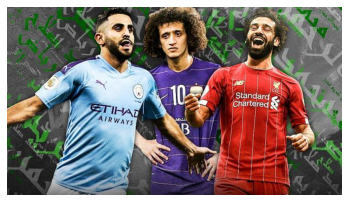

In [5]:
arab_players = plt.imread('../assets/arab_players.jpg')
plt.imshow(arab_players)
plt.axis('off')
plt.show()

### __Detecting faces in the Image__

In [6]:
face_positions = face_cascade.detectMultiScale(arab_players, 1.1, 4)

In [7]:
face_positions

array([[424,  15,  60,  60],
       [262,  27,  64,  64],
       [175,  13,  70,  70]], dtype=int32)

### __Drawing rectangles around the detected faces__

In [8]:
for (x, y, w, h) in face_positions:
    cv2.rectangle(arab_players, (x, y), (x+w, y+h), (0, 255, 0), 2)

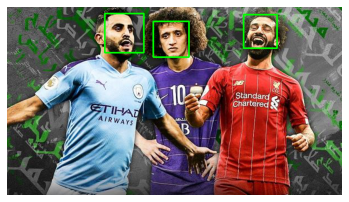

In [9]:
plt.imshow(arab_players)
plt.axis('off')
plt.show()

- _Putting the above logic in a function:_
- __Then calling it inside the video capture logic of opencv now we have realtime face detection__

## Realtime face detection

### 1. Putting the above logic into a single function

In [10]:
def detect_faces(frame):
    ## Detect faces
    face_positions = face_cascade.detectMultiScale(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY),
                                                   1.1, 4)
    
    ## Draw rectangles
    for (x, y, w, h) in face_positions:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return frame

__Rescalling the frames read by the video capture__

In [11]:
def rescale_frame(frame, percent=75):
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

### opening a stream with opencv (camera or local video)

In [12]:
cap = cv2.VideoCapture('../assets/buzzfeedClip.mp4')

while True:
    ret, frame = cap.read()
    frame = rescale_frame(frame, percent=75)
    
    frame = detect_faces(frame)
    
    cv2.imshow('frame', frame)
    
    k = cv2.waitKey(10)
    if k == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

> __By running the above cell with the provided video now you have a realtime face detection program__